### Hello everyone! Welcome
### I have performed EDA and predicted the Life Expectancy according to the features given in the dataset. I wanted to both improve myself and make easier examples for those who are just at the beginning, like me.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/life-expectancy-who/Life Expectancy Data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Using Interpolation method to deal with the null values

In [5]:
data1 = data.interpolate(method = 'linear', limit_direction = 'forward')

In [6]:
data1.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
data1.columns = data1.columns.str.replace(' ','_')

In [8]:
data1.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [9]:
data1 = data1.drop(['Country'], axis = 1)

### Changing the categories to binary values

In [10]:
data1.Status = data1.Status.map({'Developing':0, 'Developed': 1})

In [11]:
data1.head()

,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
columns = {'Year':1,'Life_expectancy_':2,'Adult_Mortality':3,'infant_deaths':4,'Alcohol':5,'percentage_expenditure':6,
            'Hepatitis_B':7,'Measles_':8,'_BMI_':9,'under-five_deaths_':10,'Polio':11,'Total_expenditure':12,'Diphtheria_':13,'_HIV/AIDS':14,
            'GDP':15,'Population':16,'_thinness__1-19_years':17,'_thinness_5-9_years':18,'Income_composition_of_resources':19,'Schooling':20}

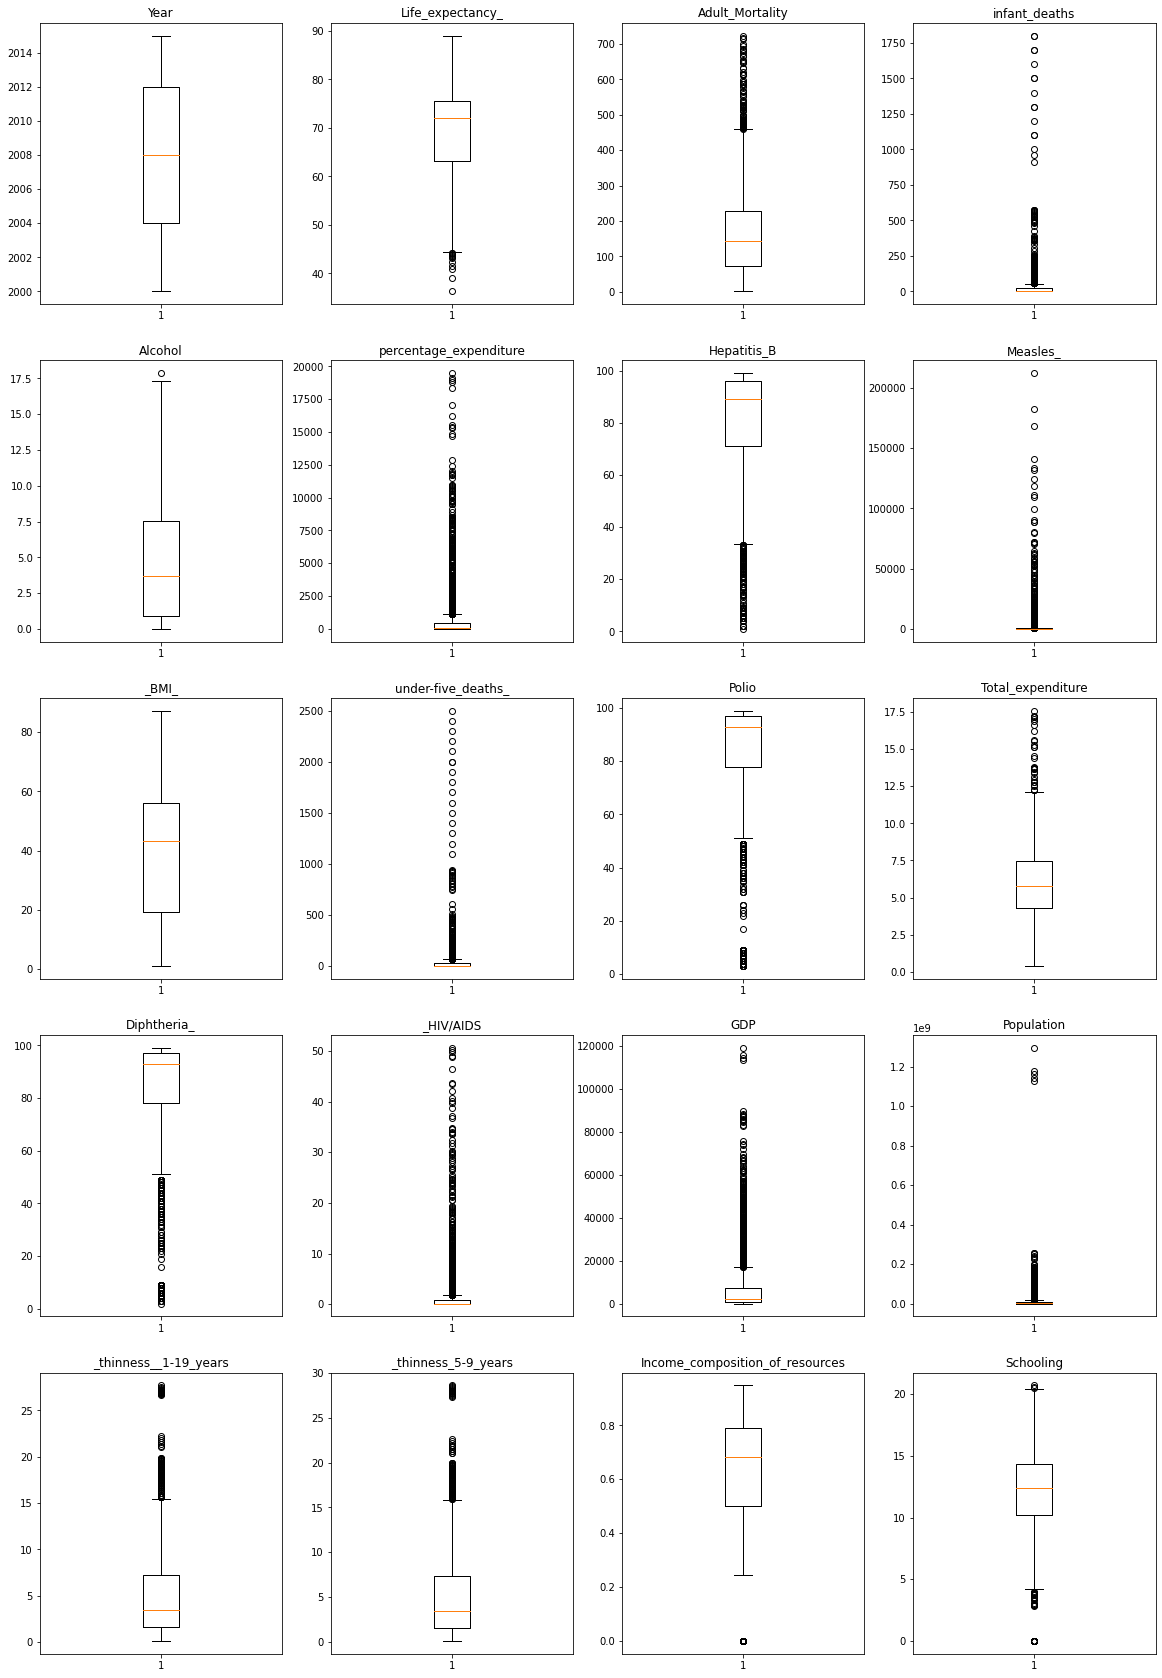

In [13]:
# let's see which columns have outliers
plt.figure(figsize = (20,30))
for var, i in columns.items():
    plt.subplot(5,4,i)
    plt.boxplot(data1[var], whis = 1.5)
    plt.title(var)
plt.show()

### Looks like we have a lot of outliers and need to deal with it!

In [14]:
data1.columns

Index(['Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


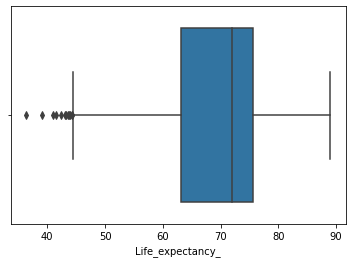

In [15]:
# all columns with outliers - 
sns.boxplot(data1.Life_expectancy_)
plt.show()

### Let's use Cube root Transformation method to deal with outliers.

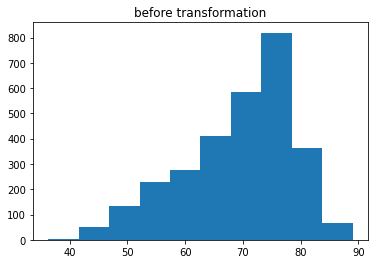

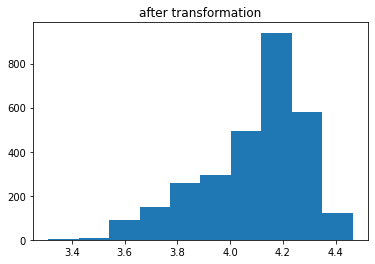

In [16]:
#Cube root transformation
plt.hist(data1['Life_expectancy_'])
plt.title('before transformation')
plt.show()
data1['Life_expectancy_'] = (data1['Life_expectancy_']**(1/3))
plt.hist(data1['Life_expectancy_'])
plt.title('after transformation')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


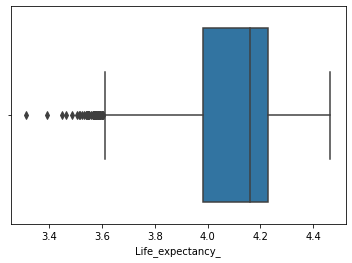

In [17]:
sns.boxplot(data1.Life_expectancy_)
plt.show()

### This method does not eliminate the outliers completely but improves or reduces the outliers indeed.

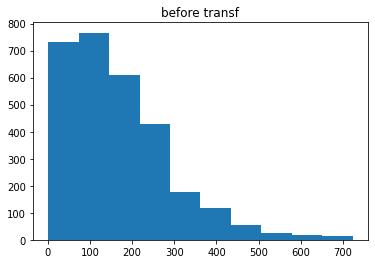

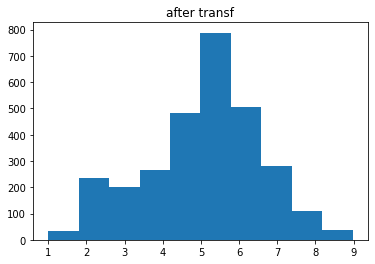

In [18]:
# for Adult_Mortality
plt.hist(data1['Adult_Mortality'])
plt.title('before transf')
plt.show()
data1['Adult_Mortality'] = (data1.Adult_Mortality**(1/3))
plt.hist(data1['Adult_Mortality'])
plt.title('after transf')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


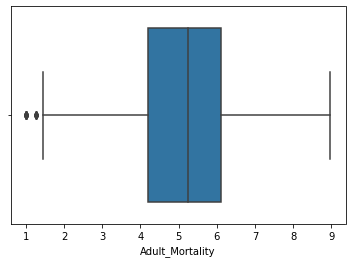

In [19]:
sns.boxplot(data1['Adult_Mortality'])
plt.show()

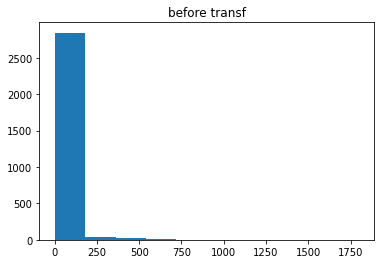

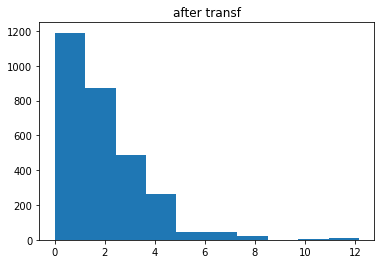

In [20]:
plt.hist(data1['infant_deaths'])
plt.title('before transf')
plt.show()
data1['infant_deaths'] = (data1['infant_deaths']**(1/3))
plt.hist(data1['infant_deaths'])
plt.title('after transf')
plt.show()

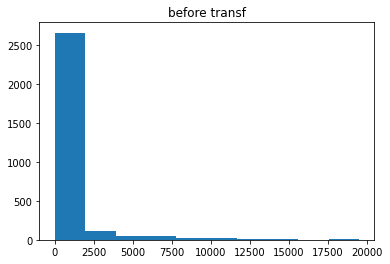

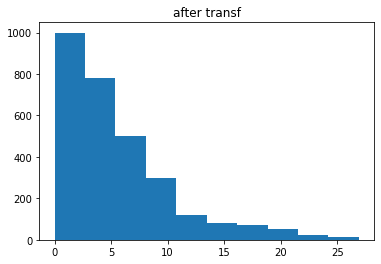

In [21]:

plt.hist(data1['percentage_expenditure'])
plt.title('before transf')
plt.show()
data1['percentage_expenditure'] = (data1['percentage_expenditure']**(1/3))
plt.hist(data1['percentage_expenditure'])
plt.title('after transf')
plt.show()


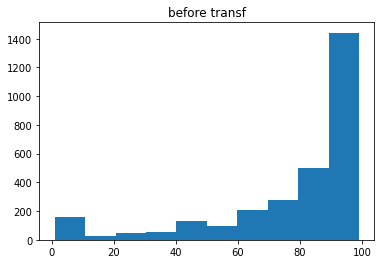

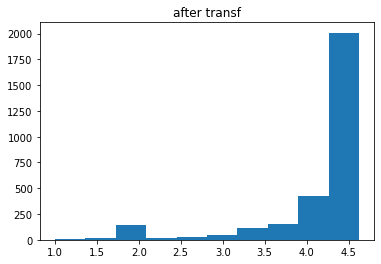

In [22]:
plt.hist(data1['Hepatitis_B'])
plt.title('before transf')
plt.show()
data1['Hepatitis_B'] = (data1['Hepatitis_B']**(1/3))
plt.hist(data1['Hepatitis_B'])
plt.title('after transf')
plt.show()

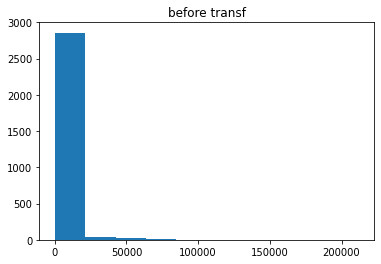

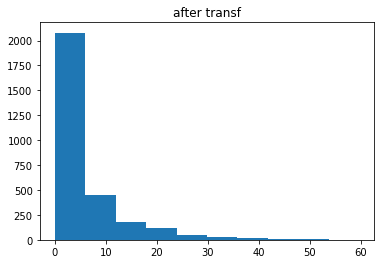

In [23]:
plt.hist(data1['Measles_'])
plt.title('before transf')
plt.show()
data1['Measles_'] = (data1['Measles_']**(1/3))
plt.hist(data1['Measles_'])
plt.title('after transf')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


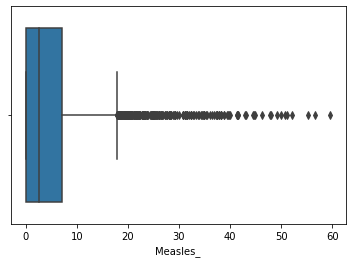

In [24]:
sns.boxplot(data1['Measles_'])
plt.show()

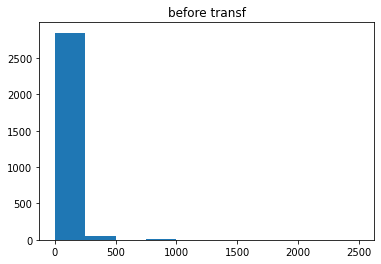

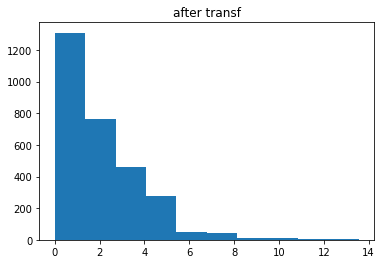

In [25]:

plt.hist(data1['under-five_deaths_'])
plt.title('before transf')
plt.show()
data1['under-five_deaths_'] = (data1['under-five_deaths_']**(1/3))
plt.hist(data1['under-five_deaths_'])
plt.title('after transf')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


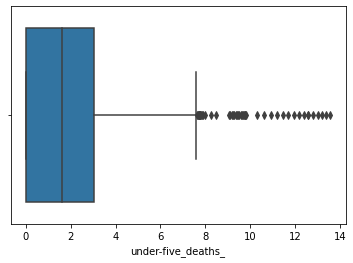

In [26]:
sns.boxplot(data1['under-five_deaths_'])
plt.show()

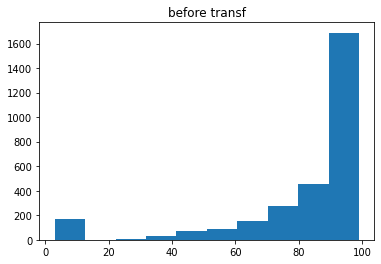

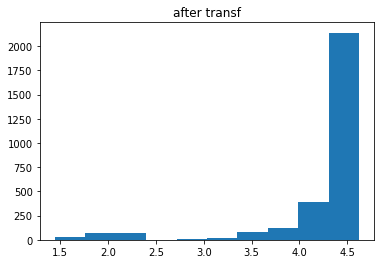

In [27]:
plt.hist(data1['Polio'])
plt.title('before transf')
plt.show()
data1['Polio'] = (data1['Polio']**(1/3))
plt.hist(data1['Polio'])
plt.title('after transf')
plt.show()

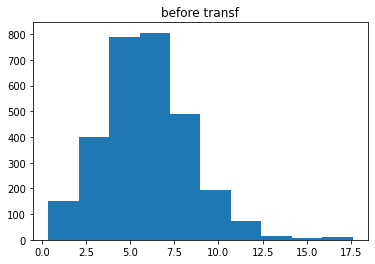

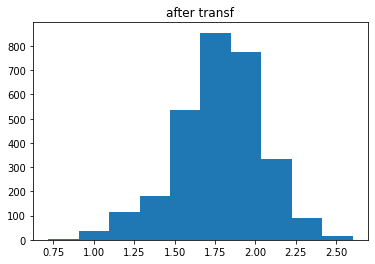

In [28]:
plt.hist(data1['Total_expenditure'])
plt.title('before transf')
plt.show()
data1['Total_expenditure'] = (data1['Total_expenditure']**(1/3))
plt.hist(data1['Total_expenditure'])
plt.title('after transf')
plt.show()

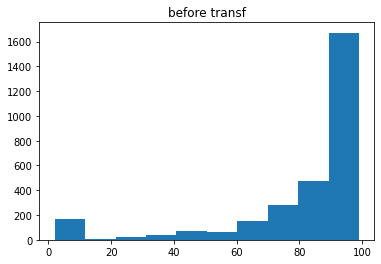

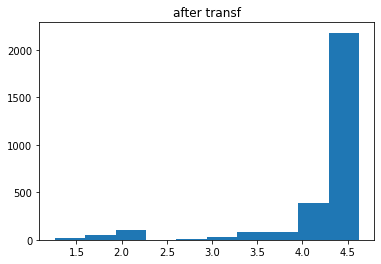

In [29]:
plt.hist(data1['Diphtheria_'])
plt.title('before transf')
plt.show()
data1['Diphtheria_'] = (data1['Diphtheria_']**(1/3))
plt.hist(data1['Diphtheria_'])
plt.title('after transf')
plt.show()

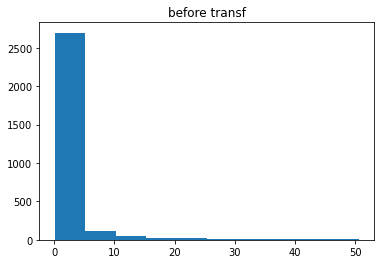

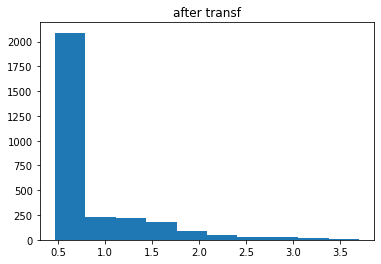

In [30]:
plt.hist(data1['_HIV/AIDS'])
plt.title('before transf')
plt.show()
data1['_HIV/AIDS'] = (data1['_HIV/AIDS']**(1/3))
plt.hist(data1['_HIV/AIDS'])
plt.title('after transf')
plt.show()

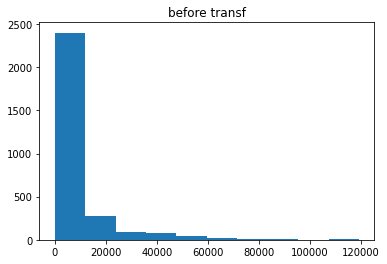

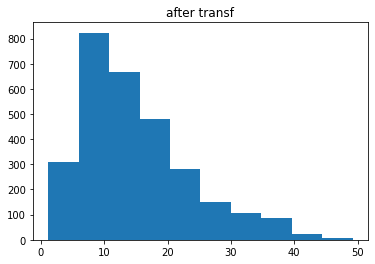

In [31]:
plt.hist(data1['GDP'])
plt.title('before transf')
plt.show()
data1['GDP'] = (data1['GDP']**(1/3))
plt.hist(data1['GDP'])
plt.title('after transf')
plt.show()

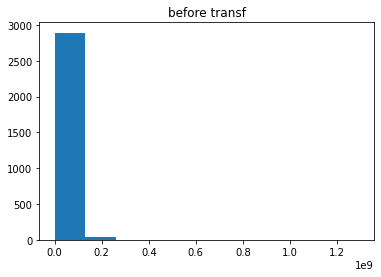

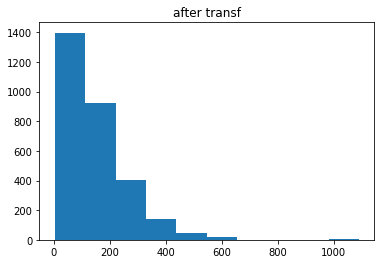

In [32]:
plt.hist(data1['Population'])
plt.title('before transf')
plt.show()
data1['Population'] = (data1['Population']**(1/3))
plt.hist(data1['Population'])
plt.title('after transf')
plt.show()

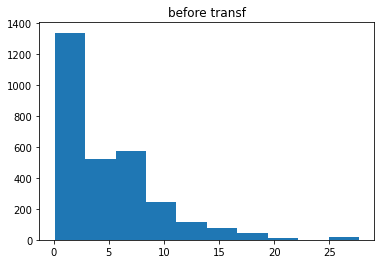

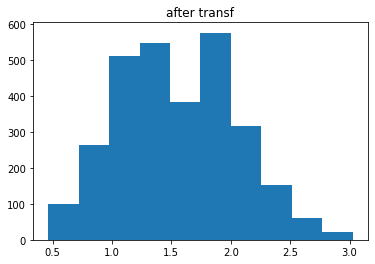

In [33]:
plt.hist(data1['_thinness__1-19_years'])
plt.title('before transf')
plt.show()
data1['_thinness__1-19_years'] = (data1['_thinness__1-19_years']**(1/3))
plt.hist(data1['_thinness__1-19_years'])
plt.title('after transf')
plt.show()

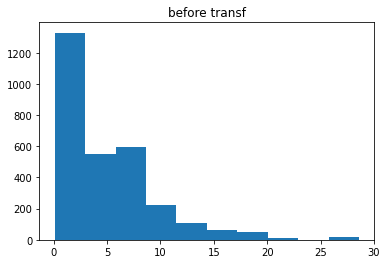

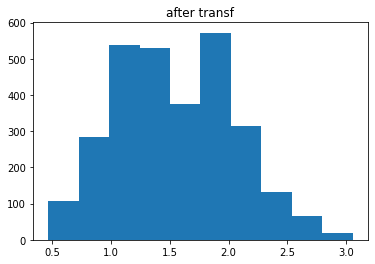

In [34]:
plt.hist(data1['_thinness_5-9_years'])
plt.title('before transf')
plt.show()
data1['_thinness_5-9_years'] = (data1['_thinness_5-9_years']**(1/3))
plt.hist(data1['_thinness_5-9_years'])
plt.title('after transf')
plt.show()

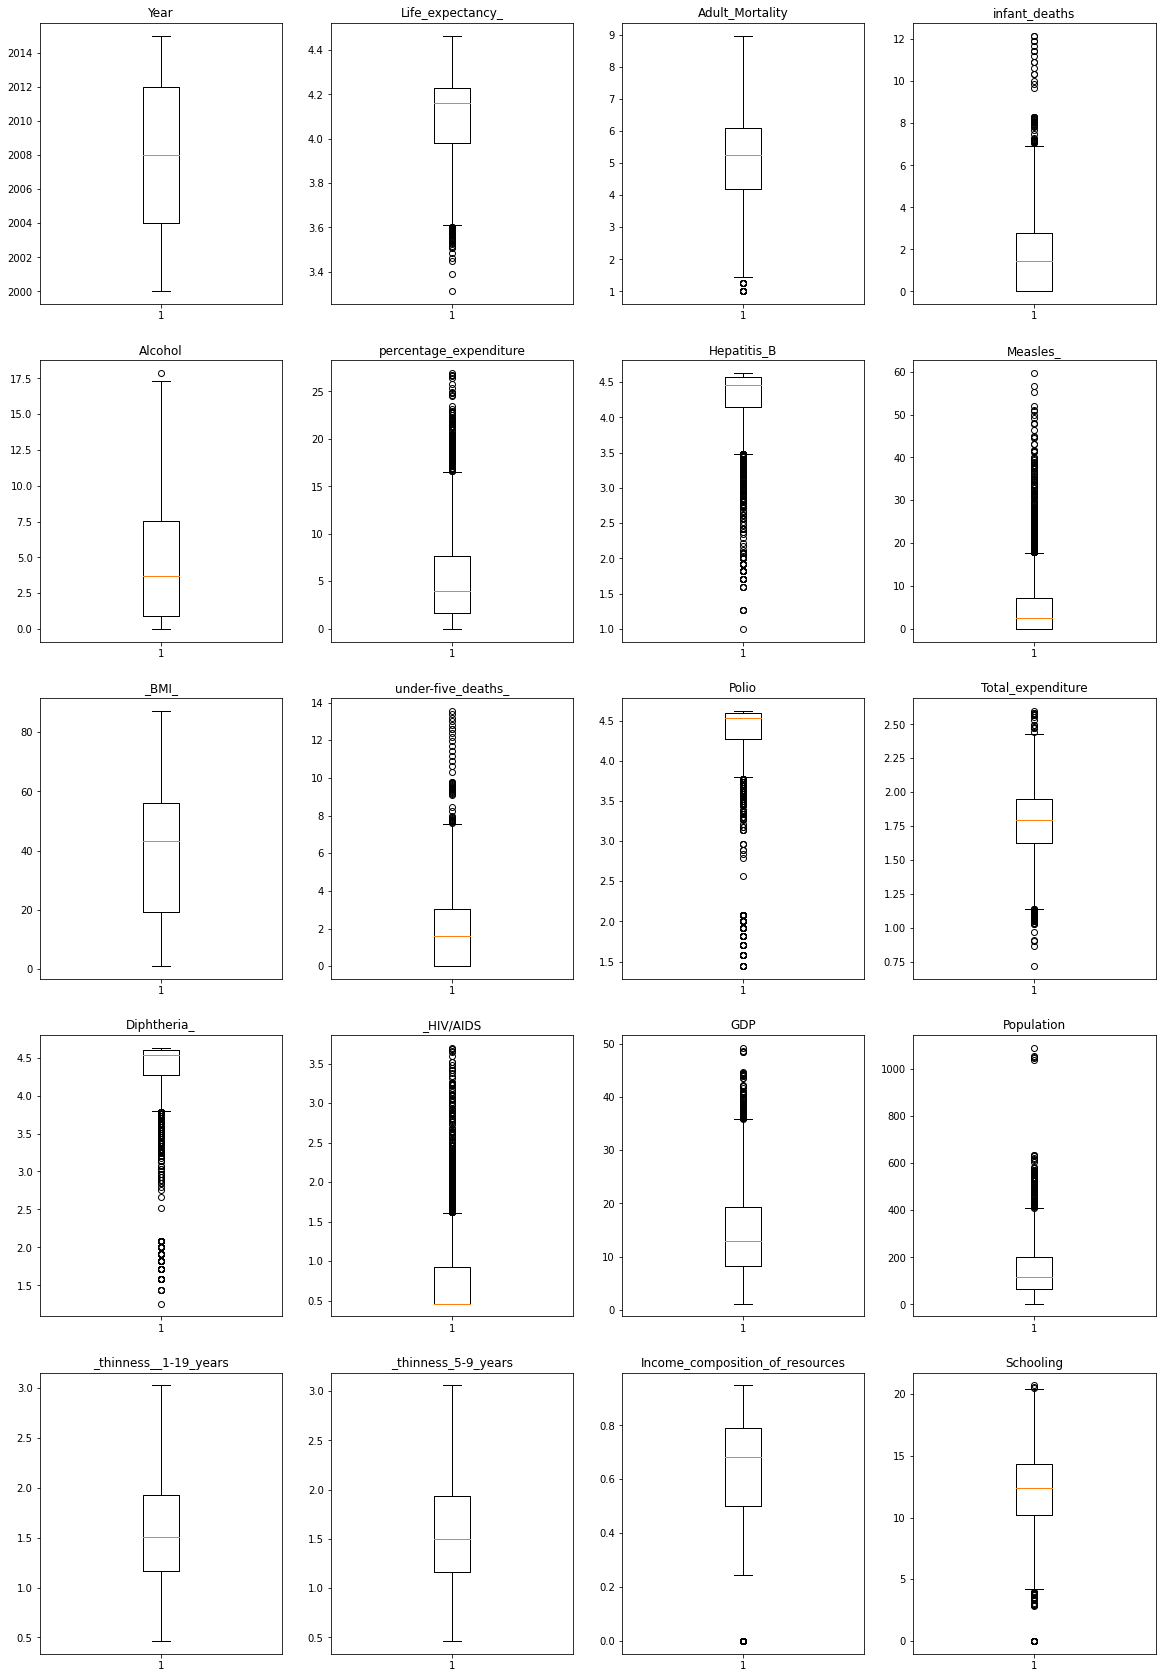

In [35]:
plt.figure(figsize = (20,30))
for var, i in columns.items():
    plt.subplot(5,4,i)
    plt.boxplot(data1[var])
    plt.title(var)
plt.show()

### There is definitely an improvement and the number of outliers have reduced significantly!

In [36]:
data1.head()

,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,0,4.020726,6.406959,3.957892,0.01,4.146247,4.020726,10.489029,19.1,4.362071,1.817121,2.013245,4.020726,0.464159,8.359915,323.122090,2.581326,2.586319,0.479,10.1
1,2014,0,3.912692,6.471274,4.000000,0.01,4.189307,3.957892,7.894447,18.6,4.414005,3.870877,2.014889,3.957892,0.464159,8.493404,68.935037,2.596247,2.596247,0.476,10.0
2,2013,0,3.912692,6.447306,4.041240,0.01,4.183519,4.000000,7.547842,18.1,4.464745,3.957892,2.010775,4.000000,0.464159,8.580526,316.590388,2.606100,2.606100,0.470,9.9
3,2012,0,3.903963,6.479224,4.101566,0.01,4.276020,4.061548,14.072751,17.6,4.530655,4.061548,2.042427,4.061548,0.464159,8.750162,154.625638,2.615879,2.620741,0.463,9.8
4,2011,0,3.897390,6.502957,4.140818,0.01,1.921736,4.081655,14.443298,17.2,4.594701,4.081655,1.989107,4.081655,0.464159,3.990336,143.881187,2.630412,2.630412,0.454,9.5


In [37]:
X = data1.drop(['Life_expectancy_'], axis= 1)
y = data1['Life_expectancy_']

In [38]:
X.head()

,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,0,6.406959,3.957892,0.01,4.146247,4.020726,10.489029,19.1,4.362071,1.817121,2.013245,4.020726,0.464159,8.359915,323.122090,2.581326,2.586319,0.479,10.1
1,2014,0,6.471274,4.000000,0.01,4.189307,3.957892,7.894447,18.6,4.414005,3.870877,2.014889,3.957892,0.464159,8.493404,68.935037,2.596247,2.596247,0.476,10.0
2,2013,0,6.447306,4.041240,0.01,4.183519,4.000000,7.547842,18.1,4.464745,3.957892,2.010775,4.000000,0.464159,8.580526,316.590388,2.606100,2.606100,0.470,9.9
3,2012,0,6.479224,4.101566,0.01,4.276020,4.061548,14.072751,17.6,4.530655,4.061548,2.042427,4.061548,0.464159,8.750162,154.625638,2.615879,2.620741,0.463,9.8
4,2011,0,6.502957,4.140818,0.01,1.921736,4.081655,14.443298,17.2,4.594701,4.081655,1.989107,4.081655,0.464159,3.990336,143.881187,2.630412,2.630412,0.454,9.5


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3
                                                   , random_state = 0)

In [40]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 200, random_state = 10, 
                            max_depth = 50)

In [41]:
reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=200, random_state=10)

In [42]:
y_pred = reg.predict(x_test)



In [43]:
from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.0015578614449765099


In [44]:
print('R2 score: ', metrics.r2_score(y_test, y_pred))

R2 score:  0.9583997368065335


### Ok so Random Forest gives a pretty good score but let's explore more with Cross validation.

In [45]:
y.shape

(2938,)

In [46]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = cross_val_score(reg, x_train, y_train, cv = KFold(10))
print(results)
print(np.mean(results))

[0.96654223 0.95276561 0.96836264 0.96473829 0.95841719 0.95809524
 0.94621366 0.96782566 0.96421123 0.96244149]
0.960961324424398


### Great! We have 96 % score now!

### Let's check if Randomized Search CV gives us a better result.

In [47]:
# Randomized Search CV
from sklearn.model_selection import GridSearchCV
params = [{'n_estimators': [50, 100,200,300,400,500], 
          'criterion': ['squared_error', 'absolute_error'],
           'max_depth': [10, 15, 30, 50, 100, 200],
           'max_features':['auto','sqrt','log2'],
           'random_state':[0, 10, 20, 50, 70, 100],
           'n_jobs':[-1,  1]}]

In [48]:
# randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
RScv = RandomizedSearchCV(reg, param_distributions = params, 
                          n_iter = 5, cv = 5)
RScv = RScv.fit(x_train, y_train)

In [49]:
RScv.best_score_

0.9558522764770844

In [50]:
RScv.best_params_

{'random_state': 20,
 'n_jobs': -1,
 'n_estimators': 300,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'absolute_error'}

In [51]:
reg_RS = RandomForestRegressor(random_state= 100,
 n_jobs= -1,
 n_estimators= 500,
 max_features= 'auto',
 max_depth= 100,
 criterion= 'mse')
reg_RS.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=100, n_estimators=500,
                      n_jobs=-1, random_state=100)

In [52]:
RS_pred = reg_RS.predict(x_test)

In [53]:
print('MSE: ',metrics.mean_squared_error(y_test, RS_pred))
print('R2 score',metrics.r2_score(y_test, RS_pred))

MSE:  0.0015637761270265215
R2 score 0.9582417944357408


### So there was no significant improvement after using RandomizedSearchCV

### Let us try other algorithms as well just in case

In [54]:
# trying other algorithms
!pip install xgboost

In [55]:
from xgboost import XGBRegressor

In [56]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model1 = XGBRegressor()

In [57]:
model1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [58]:
xg_pred = model1.predict(x_test)

In [59]:
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, xg_pred))
print('R2 score: ',metrics.r2_score(y_test, xg_pred))

Mean Squared Error:  0.0016251696409977478
R2 score:  0.956602376278362


In [60]:
# trying with params
model.fit(x_train,y_train)
xg_pred1 = model.predict(x_test)

In [61]:
print('Mean squared error: ',metrics.mean_squared_error(y_test,xg_pred1))
print('r2 score: ',metrics.r2_score(y_test, xg_pred1))

Mean squared error:  0.0014111426048558611
r2 score:  0.962317634886713


### So with XgBoost we are getting a better mse score

### Let us try Cross Validation here as well

In [62]:
# cross validation for xgboost
xg_result = cross_val_score(model1, x_train, y_train, cv = KFold(10))
print(xg_result)
print(np.mean(xg_result))

[0.95333909 0.95181783 0.95125542 0.95351654 0.95577444 0.95270518
 0.93851076 0.96098773 0.96242451 0.95615629]
0.9536487786184568


### Some more algorithms....

### Ransac algorithm is known to deal with outliers. Let's check if it works for us

In [63]:
# ransac regression
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(min_samples=10, max_trials=50, loss='absolute_loss', random_state=42, residual_threshold=50)
ransac.fit(x_train, y_train)
predsRR = ransac.predict(x_test)
mse = metrics.mean_squared_error(y_test, predsRR)
print("MSE : % f" %(mse))

MSE :  0.005888


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


In [64]:
print('R2 score', metrics.r2_score(y_test, predsRR))

R2 score 0.8427696566040657


In [65]:
!pip install catboost

In [66]:
from catboost import CatBoostRegressor
cat= CatBoostRegressor(loss_function='RMSE')
cat.fit(x_train, y_train, eval_set = (x_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057022
0:	learn: 0.1885120	test: 0.1851210	best: 0.1851210 (0)	total: 57.3ms	remaining: 57.2s
1:	learn: 0.1805577	test: 0.1773098	best: 0.1773098 (1)	total: 60.2ms	remaining: 30s
2:	learn: 0.1728400	test: 0.1695349	best: 0.1695349 (2)	total: 63.1ms	remaining: 21s
3:	learn: 0.1658603	test: 0.1626410	best: 0.1626410 (3)	total: 65.7ms	remaining: 16.4s
4:	learn: 0.1588529	test: 0.1556804	best: 0.1556804 (4)	total: 68.4ms	remaining: 13.6s
5:	learn: 0.1524050	test: 0.1495572	best: 0.1495572 (5)	total: 71.1ms	remaining: 11.8s
6:	learn: 0.1463464	test: 0.1435867	best: 0.1435867 (6)	total: 73.9ms	remaining: 10.5s
7:	learn: 0.1408389	test: 0.1380649	best: 0.1380649 (7)	total: 76.7ms	remaining: 9.52s
8:	learn: 0.1358374	test: 0.1331855	best: 0.1331855 (8)	total: 79.6ms	remaining: 8.76s
9:	learn: 0.1307861	test: 0.1283113	best: 0.1283113 (9)	total: 82.5ms	remaining: 8.17s
10:	learn: 0.1258797	test: 0.1236004	best: 0.1236004 (10)	total: 85.2ms	remaining: 7.66s
11:	learn: 0.12

### Conclusion

### XgBoost - Mean squared error:  0.0014111426048558611  R2 score:  0.962317634886713
### Random Forest - Mean Squared Error:  0.0015578614449765099 R2 score - 0.960961324424398 